In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def lineal(x, a, b):
    return a*x + b
def logaritmica(x, a, b):
    return -a*np.log(-x) + b
def coef_determinacion(observaciones, predicciones):
    residuo = observaciones - predicciones
    ss_res = np.sum(residuo**2)
    ss_tot = np.sum((observaciones - np.mean(observaciones))**2)
    r_cuadrado = 1 - (ss_res/ss_tot)
    return r_cuadrado
def regresion(modelo, x, y):
    # No puede haber nungún NaN
    ajuste, covarianzas = curve_fit(modelo, x, y)
    predicciones = modelo(x, *ajuste)
    errores = np.sqrt(np.diag(covarianzas))
    r_cuadrado = coef_determinacion(y, predicciones)
    return predicciones, ajuste, errores, r_cuadrado

def metadata(titulo, ejex, ejey):
    plt.title(titulo, fontsize = 60, fontweight='bold')
    plt.xlabel(ejex, fontsize = 35)
    plt.ylabel(ejey, fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    return
def cifras_signif(i, cifras):
    return str('{:g}'.format(float('{:.{p}g}'.format(i, p = cifras))))
def grafico_modelo(x, y, predicciones, ajuste, errores, r_cuad):
    plt.plot(x, y, 'bo')
    plt.plot(x, predicciones, 'r-',
             label = (' a = ' + cifras_signif(ajuste[0], 2)
                      + ' std_a = ' + cifras_signif(errores[0], 2) + '\n'
                      + ' b = ' + cifras_signif(ajuste[1], 2)
                      + ' std_b = ' + cifras_signif(errores[1], 2) + '\n'
                      + ' R^2 = ' + cifras_signif(r_cuad, 2)
                     )
             )
    plt.legend(fontsize = 20)
    return

def regresion_y_grafico(modelo, x, y, titulo, xlabel, ylabel):
    predicciones, ajuste, errores, r_cuadrado = regresion(modelo, x, y)
    scatter = plt.figure(figsize = (18, 9))
    metadata(titulo, xlabel, ylabel)
    grafico_modelo(x, y, predicciones, ajuste, errores, r_cuadrado)
    return scatter

In [3]:
etp = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\Ej_3_etp.txt',
    delimiter = ' ',
    decimal = '.',
    )
kc = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\Ej_3_kc.txt',
    delimiter = ' ',
    decimal = '.',
    )
pp = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\Ej_3_pp.txt',
    delimiter = ' ',
    decimal = '.',
    )

In [4]:
etp.head()

,Anio,21/5,31/5,10/6,20/6,30/6,10/7,20/7,31/7,10/8,20/8,31/8
0,1969,44.6,52.5,47.9,53.9,52.4,54.4,50.6,58.5,63.0,62.9,66.0
1,1970,56.6,99.0,63.0,74.9,77.3,47.6,61.7,66.9,51.2,47.8,43.7
2,1971,68.7,54.6,57.7,52.8,46.7,44.0,39.0,45.0,57.8,56.7,44.2
3,1972,76.0,60.2,64.5,57.5,69.8,65.0,71.9,60.4,56.0,52.4,71.4
4,1973,74.0,126.0,60.9,44.5,44.0,60.3,47.3,116.9,95.8,101.4,102.9


In [5]:
kc.head()

,21/5,31/5,10/6,20/6,30/6,10/7,20/7,31/7,10/8,20/8,31/8
0,0.2,0.2,0.22,0.4,0.6,0.8,1,1.4,1.05,0.8,0.52


In [24]:
kc_veg = kc[['21/5', '31/5', '10/6', '20/6', '30/6', '10/7']].values.mean()
kc_flo = kc[['20/7', '31/7']].values.mean()
kc_fru = kc[['10/8', '20/8']].values.mean()
kc_mad = kc[['31/8']].values.mean()
kcs = [kc_veg, kc_flo, kc_fru, kc_mad]
kcs

[0.4033333333333333, 1.2, 0.925, 0.52]

In [6]:
pp.head()

,Anio,21/5,31/5,10/6,20/6,30/6,10/7,20/7,31/7,10/8,20/8,31/8
0,1969,161,38,149,149,187,120,62,33,126,166,20
1,1970,131,178,18,184,161,25,161,207,96,63,130
2,1971,206,35,99,178,36,4,118,64,90,167,351
3,1972,87,103,121,24,80,0,35,43,0,45,145
4,1973,43,246,154,286,132,9,59,186,39,108,300


In [7]:
etm = pp[:]
columnas = kc.columns
for i in columnas:
    etm[i] = etp[i] * float(kc[i])
etm.head()

,Anio,21/5,31/5,10/6,20/6,30/6,10/7,20/7,31/7,10/8,20/8,31/8
0,1969,8.92,10.50,10.538,21.56,31.44,43.52,50.6,81.90,66.15,50.32,34.320
1,1970,11.32,19.80,13.860,29.96,46.38,38.08,61.7,93.66,53.76,38.24,22.724
2,1971,13.74,10.92,12.694,21.12,28.02,35.20,39.0,63.00,60.69,45.36,22.984
3,1972,15.20,12.04,14.190,23.00,41.88,52.00,71.9,84.56,58.80,41.92,37.128
4,1973,14.80,25.20,13.398,17.80,26.40,48.24,47.3,163.66,100.59,81.12,53.508


In [8]:
deficit = pp - etm
deficit['Anio'] = pp['Anio']
deficit.head()

,Anio,21/5,31/5,10/6,20/6,30/6,10/7,20/7,31/7,10/8,20/8,31/8
0,1969,152.08,27.50,138.462,127.44,155.56,76.48,11.4,-48.90,59.85,115.68,-14.320
1,1970,119.68,158.20,4.140,154.04,114.62,-13.08,99.3,113.34,42.24,24.76,107.276
2,1971,192.26,24.08,86.306,156.88,7.98,-31.20,79.0,1.00,29.31,121.64,328.016
3,1972,71.80,90.96,106.810,1.00,38.12,-52.00,-36.9,-41.56,-58.80,3.08,107.872
4,1973,28.20,220.80,140.602,268.20,105.60,-39.24,11.7,22.34,-61.59,26.88,246.492


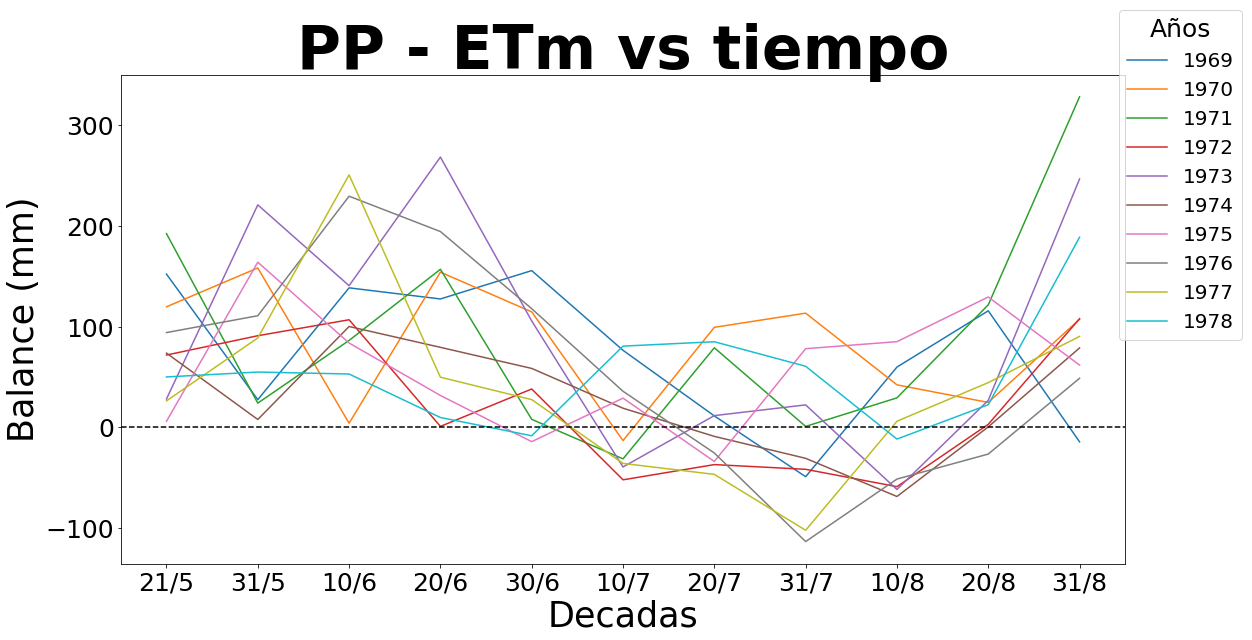

In [10]:
graficos = plt.figure(figsize = (18, 9))
metadata('PP - ETm vs tiempo', 'Decadas', 'Balance (mm)')
iterador = list(range(len(deficit['Anio'])))
for i in iterador:
    plt.plot(
        columnas,
        deficit.iloc[i][1:],
        '-'
        )
plt.axhline(0, color = 'black', ls = '--')
plt.figlegend(deficit['Anio'], fontsize = 20, title = 'Años', title_fontsize = 25)

In [11]:
graficos.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\deficit.png')

In [27]:
deficit['Balance'] = deficit[columnas].sum(axis = 1)
columnas = kc.columns
for i in columnas:
    contador = list(range(len(deficit[i])))
    for j in contador:
        if deficit[i][j] > 0:
            deficit[i][j] = 'NaN'
deficit['Total'] = deficit[columnas].sum(axis = 1)
deficit.head(10)

C:\Users\nahue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Anio,21/5,31/5,10/6,20/6,30/6,10/7,20/7,31/7,10/8,20/8,31/8,Balance,Total
0,1969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-48.90,NaN,NaN,-14.32,801.232,-63.220
1,1970,NaN,NaN,NaN,NaN,NaN,-13.08,NaN,NaN,NaN,NaN,NaN,924.516,-13.080
2,1971,NaN,NaN,NaN,NaN,NaN,-31.20,NaN,NaN,NaN,NaN,NaN,995.272,-31.200
3,1972,NaN,NaN,NaN,NaN,NaN,-52.00,-36.9,-41.56,-58.800,NaN,NaN,230.382,-189.260
4,1973,NaN,NaN,NaN,NaN,NaN,-39.24,NaN,NaN,-61.590,NaN,NaN,969.984,-100.830
5,1974,NaN,NaN,NaN,NaN,NaN,NaN,-8.9,-30.68,-68.545,NaN,NaN,309.929,-108.125
6,1975,NaN,NaN,NaN,NaN,-14.14,NaN,-33.8,NaN,NaN,NaN,NaN,620.849,-47.940
7,1976,NaN,NaN,NaN,NaN,NaN,NaN,-25.4,-113.26,-51.265,-26.44,NaN,614.615,-216.365
8,1977,NaN,NaN,NaN,NaN,NaN,-35.72,-46.6,-102.04,NaN,NaN,NaN,399.477,-184.360
9,1978,NaN,NaN,NaN,NaN,-8.30,NaN,NaN,NaN,-11.575,NaN,NaN,585.467,-19.875


In [28]:
deficit['dias'] = (deficit.count(axis=1)-3) * 10
deficit['dias'].head()

0    20
1    10
2    10
3    40
4    20
Name: dias, dtype: int64

In [32]:
deficit['dias_floracion'] = deficit[['30/6', '10/7']].count(axis=1) * 10
deficit['dias_maduracion'] = deficit[['20/7', '31/7', '10/8', '20/8']].count(axis=1) * 10

In [34]:
deficit[['dias_floracion', 'dias_maduracion']].head(30)

,dias_floracion,dias_maduracion
0,0,10
1,10,0
2,10,0
3,10,30
4,10,10
5,0,30
6,10,10
7,0,40
8,10,20
9,10,10


In [17]:
datos = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\Ej_2.txt',
    delimiter = ' ',
    decimal = '.',
    )
datos.head()

,Anio,Rendimiento_nativo(QQ/ha),Rendimiento_hibrido(QQ/ha),Precipitacion_anual(mm)
0,1965,11.8,30.7,1029
1,1966,19.8,36.4,1745
2,1967,14.9,30.8,1026
3,1968,21.2,37.9,1063
4,1969,16.8,36.0,1332


In [15]:
dias = pd.read_csv(
    'C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\Ej_3_stress.txt',
    delimiter = '\t',
    decimal = '.',
    )
dias.head()

,Anio,vegetativo,floracion,cosecha,maduracion,Total
0,1969,0,6,5,1,12
1,1970,1,1,0,0,2
2,1971,9,2,0,0,11
3,1972,6,20,20,0,46
4,1973,2,8,15,0,25


In [28]:
stress_pond = dias[:]
stress_pond['vegetativo'] = kcs[0] * dias['vegetativo']
stress_pond['floracion'] = kcs[1] * dias['floracion']
stress_pond['cosecha'] = kcs[2] * dias['cosecha']
stress_pond['maduracion'] = kcs[3] * dias[['maduracion']]
stress_pond['Total'] = (stress_pond['vegetativo']
                        + stress_pond['floracion']
                        + stress_pond['cosecha']
                        + stress_pond['maduracion']
                       )
stress_pond.head()

,Anio,vegetativo,floracion,cosecha,maduracion,Total
0,1969,0.000000,7.2,4.625,0.52,12.345000
1,1970,0.403333,1.2,0.000,0.00,1.603333
2,1971,3.630000,2.4,0.000,0.00,6.030000
3,1972,2.420000,24.0,18.500,0.00,44.920000
4,1973,0.806667,9.6,13.875,0.00,24.281667


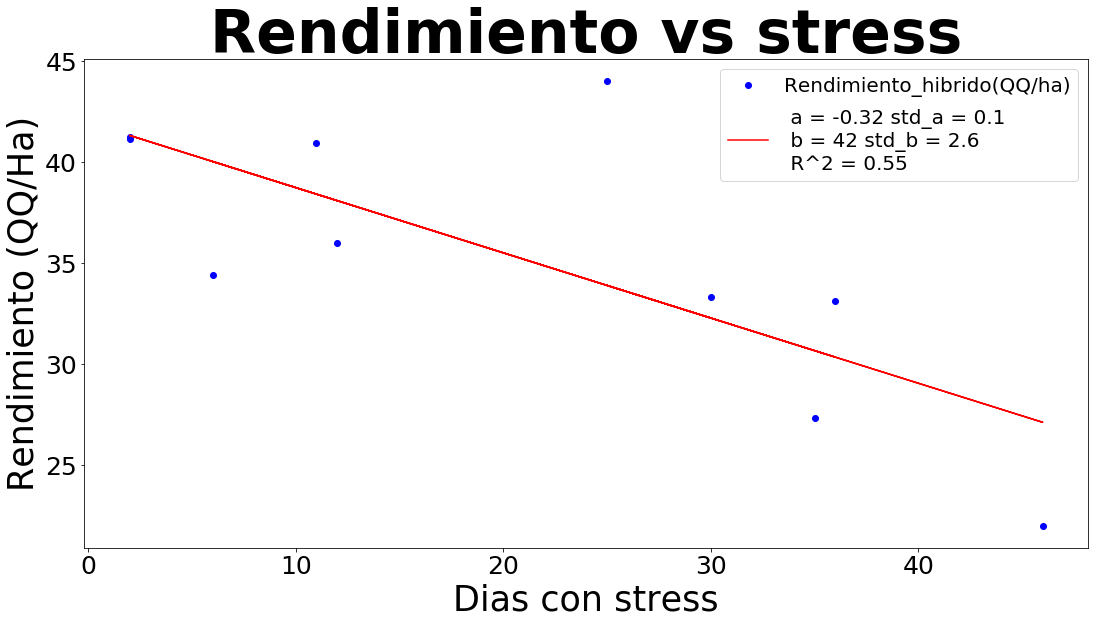

In [18]:
y = datos['Rendimiento_hibrido(QQ/ha)'][4:].reset_index()['Rendimiento_hibrido(QQ/ha)']
reg = regresion_y_grafico(lineal, dias['Total'], y,
                          'Rendimiento vs stress',
                          'Dias con stress',
                          'Rendimiento (QQ/Ha)'
                         )

In [19]:
reg.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\rend_vs_stress.png')

In [43]:
ponderado = pp[:]
columnas = kc.columns
for i in columnas:
    contador = list(range(len(ponderado[i])))
    for j in contador:
        if deficit[i][j] < 0:
            ponderado[i][j] = 10 * float(kc[i])
        else: ponderado[i][j] = 0
ponderado['Total'] = ponderado[columnas].sum(axis = 1)
ponderado.head(10)

C:\Users\nahue\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Anio,21/5,31/5,10/6,20/6,30/6,10/7,20/7,31/7,10/8,20/8,31/8,Total
0,1969,0,0,0,0,0,0,0,14,0,0,5,19
1,1970,0,0,0,0,0,8,0,0,0,0,0,8
2,1971,0,0,0,0,0,8,0,0,0,0,0,8
3,1972,0,0,0,0,0,8,10,14,10,0,0,42
4,1973,0,0,0,0,0,8,0,0,10,0,0,18
5,1974,0,0,0,0,0,0,10,14,10,0,0,34
6,1975,0,0,0,0,6,0,10,0,0,0,0,16
7,1976,0,0,0,0,0,0,10,14,10,8,0,42
8,1977,0,0,0,0,0,8,10,14,0,0,0,32
9,1978,0,0,0,0,6,0,0,0,10,0,0,16


In [11]:
np.corrcoef(ponderado['Total'], datos['Rendimiento_hibrido(QQ/ha)'][4:])

array([[1.        , 0.77147153],
       [0.77147153, 1.        ]])

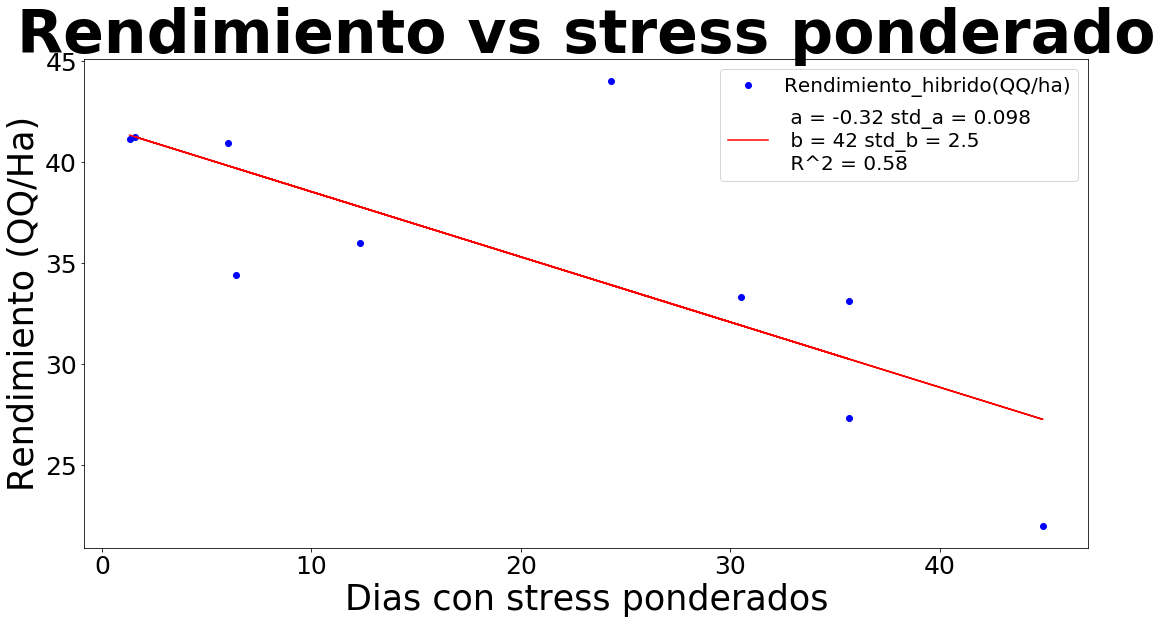

In [29]:
y = datos['Rendimiento_hibrido(QQ/ha)'][4:].reset_index()['Rendimiento_hibrido(QQ/ha)']
r_h = regresion_y_grafico(lineal, stress_pond['Total'], y,
                          'Rendimiento vs stress ponderado',
                          'Dias con stress ponderados',
                          'Rendimiento (QQ/Ha)'
                         )

In [30]:
r_h.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\rend_vs_stress_ponderado.png')

In [38]:
deficit['crecimiento'] = deficit[['21/5', '31/5', '10/6', '20/6']].sum(axis = 1)
deficit['floracion'] = deficit[['30/6', '10/7']].sum(axis = 1)
deficit['grano'] = deficit[['20/7', '31/7', '10/8', '20/8', '31/8']].sum(axis = 1)
deficit.head()

,Anio,21/5,31/5,10/6,20/6,30/6,10/7,20/7,31/7,10/8,20/8,31/8,Total,Balance,crecimiento,floracion,grano
0,1969,0.0,0.0,0.0,0.0,0.0,0.00,0.0,-48.90,0.00,0.0,-14.32,-63.22,801.232,0.0,0.00,-63.22
1,1970,0.0,0.0,0.0,0.0,0.0,-13.08,0.0,0.00,0.00,0.0,0.00,-13.08,924.516,0.0,-13.08,0.00
2,1971,0.0,0.0,0.0,0.0,0.0,-31.20,0.0,0.00,0.00,0.0,0.00,-31.20,995.272,0.0,-31.20,0.00
3,1972,0.0,0.0,0.0,0.0,0.0,-52.00,-36.9,-41.56,-58.80,0.0,0.00,-189.26,230.382,0.0,-52.00,-137.26
4,1973,0.0,0.0,0.0,0.0,0.0,-39.24,0.0,0.00,-61.59,0.0,0.00,-100.83,969.984,0.0,-39.24,-61.59


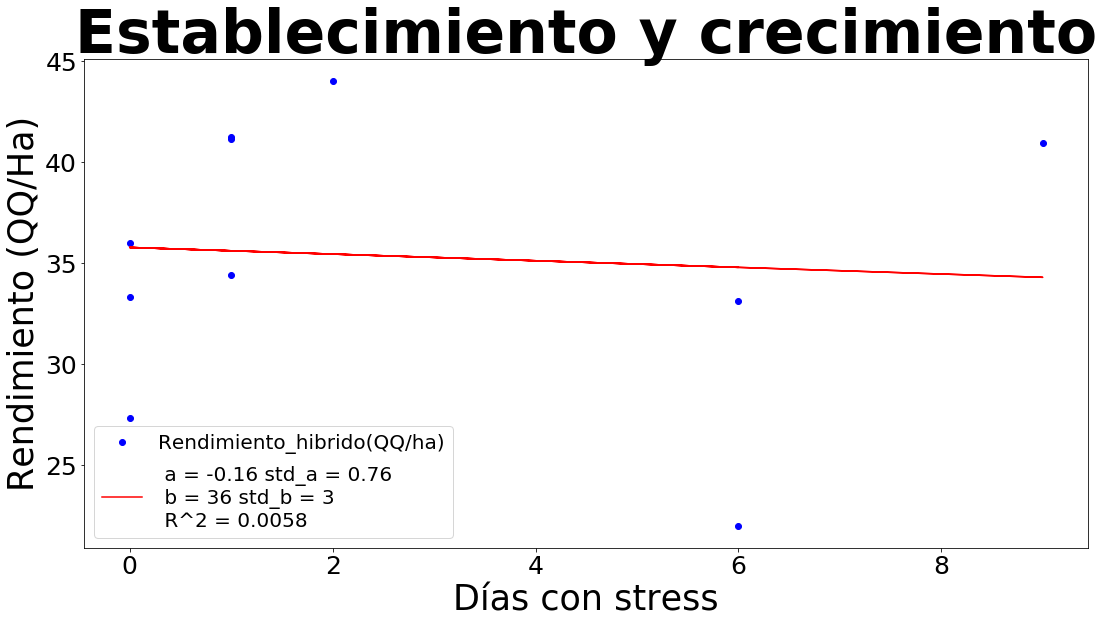

In [32]:
r_c = regresion_y_grafico(lineal, dias['vegetativo'], y,
                          'Establecimiento y crecimiento',
                          'Días con stress', 'Rendimiento (QQ/Ha)'
                         )

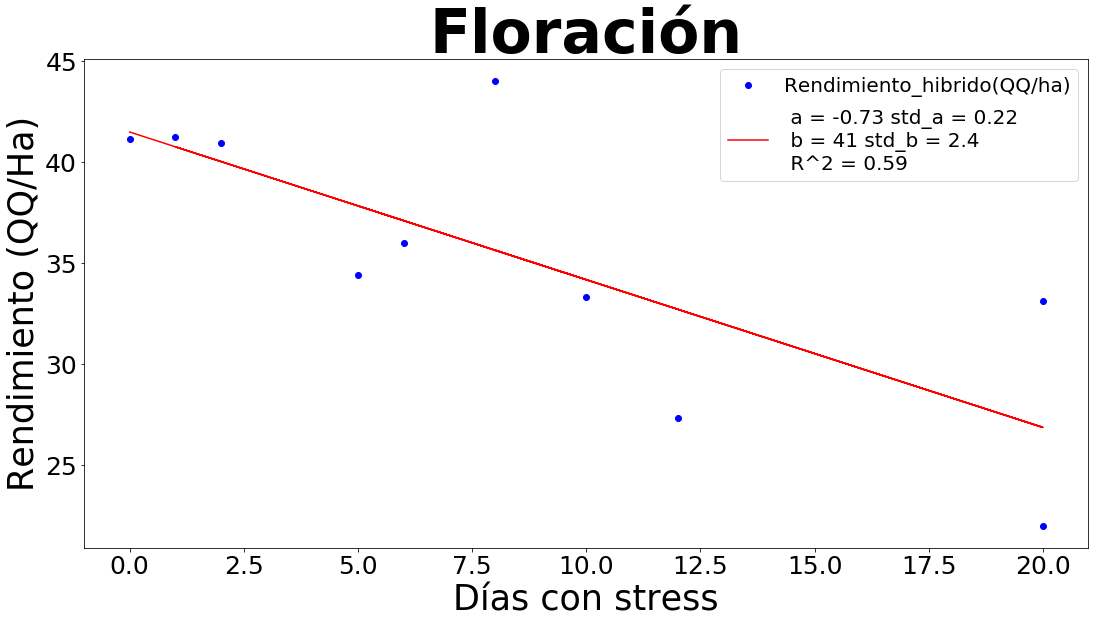

In [33]:
r_f = regresion_y_grafico(lineal, dias['floracion'], y,
                          'Floración', 'Días con stress',
                          'Rendimiento (QQ/Ha)'
                         )

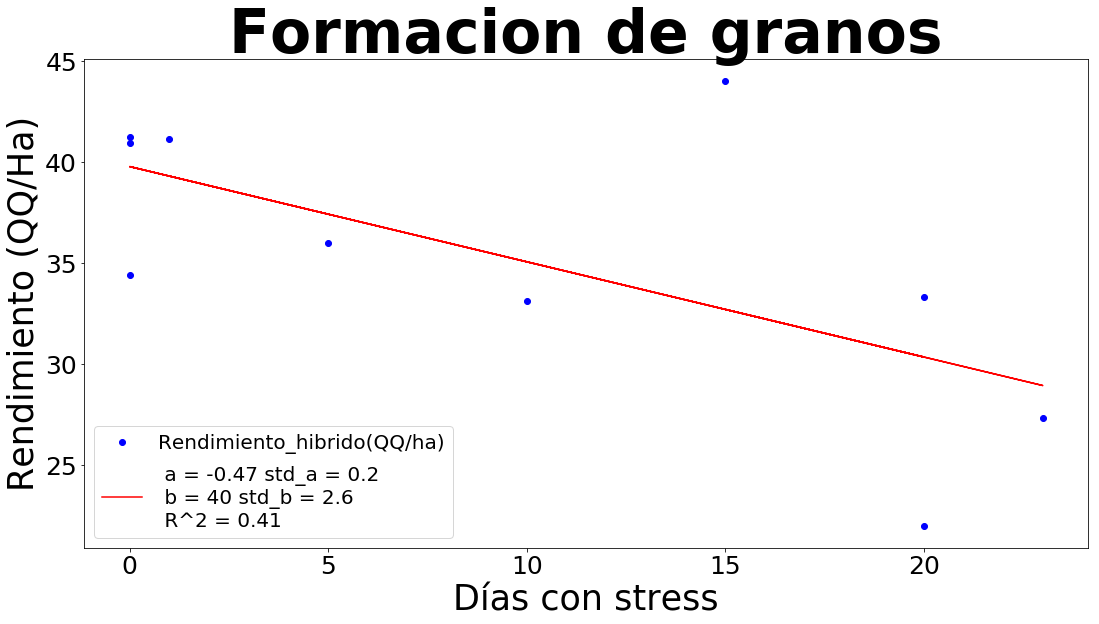

In [34]:
r_g = regresion_y_grafico(lineal, dias['cosecha'], y,
                          'Formacion de granos', 'Días con stress',
                          'Rendimiento (QQ/Ha)'
                          )

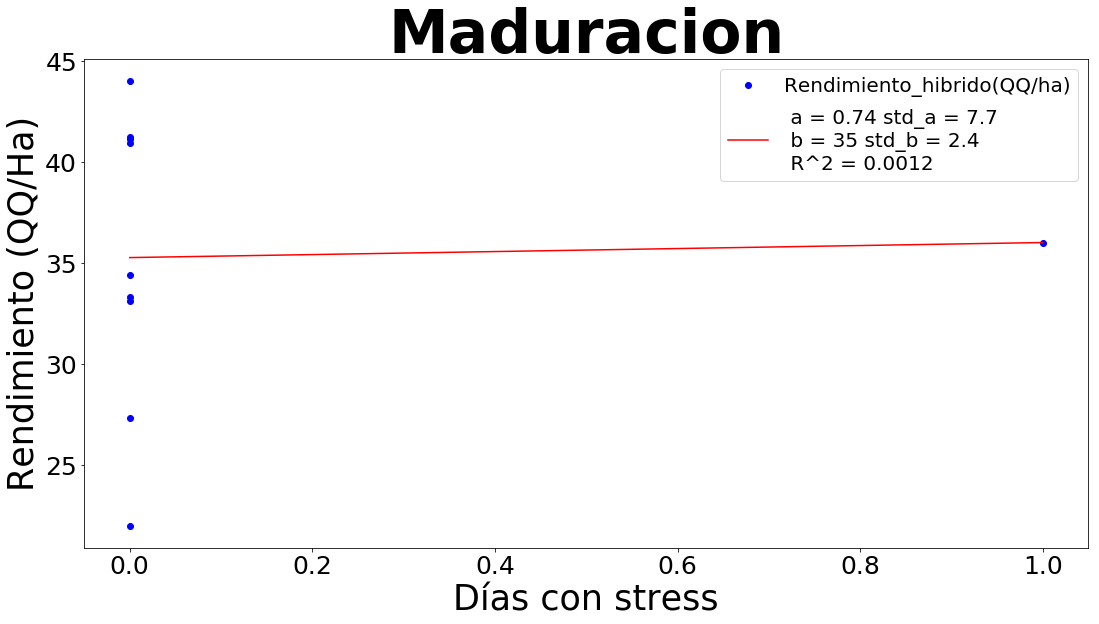

In [35]:
r_m = regresion_y_grafico(lineal, dias['maduracion'], y,
                          'Maduracion', 'Días con stress',
                          'Rendimiento (QQ/Ha)'
                          )

In [36]:
r_c.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\rend_vs_stress_crecimiento.png')
r_f.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\rend_vs_stress_floracion.png')
r_g.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\rend_vs_stress_granos.png')

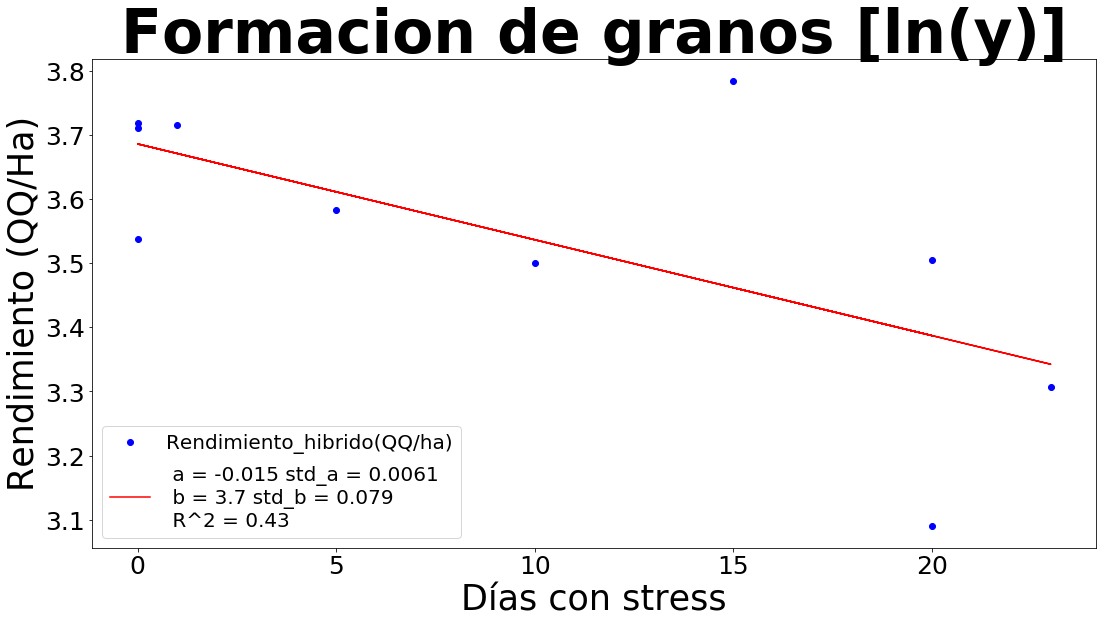

In [40]:
r_g_log = regresion_y_grafico(lineal, dias['cosecha'], np.log(y),
                              'Formacion de granos [ln(y)]',
                              'Días con stress', 'Rendimiento (QQ/Ha)'
                             )

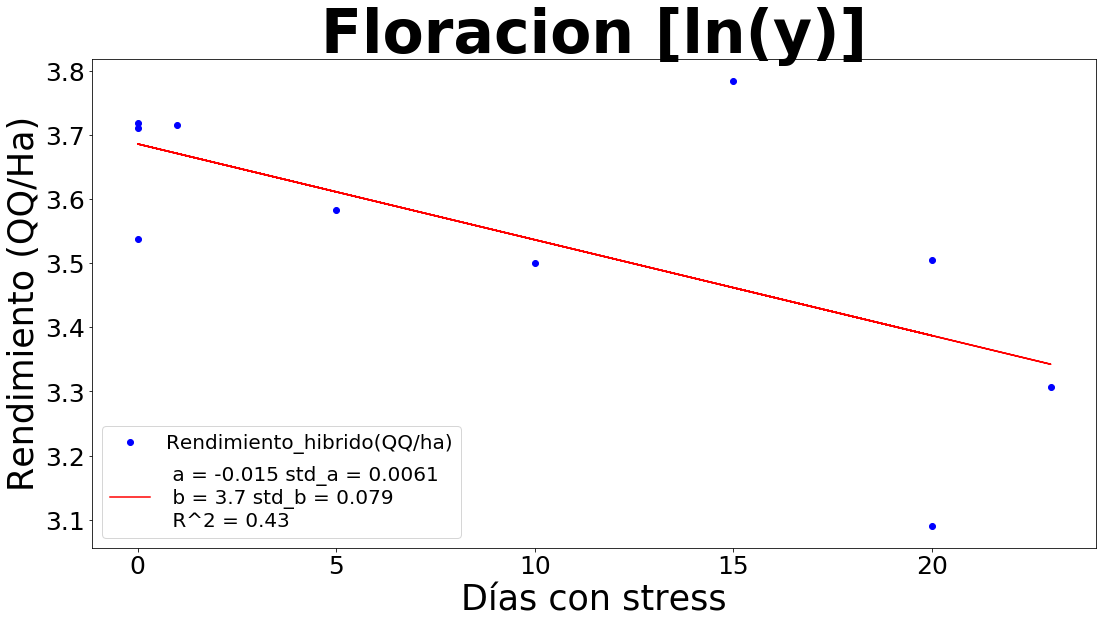

In [41]:
r_f_log = regresion_y_grafico(lineal, dias['cosecha'], np.log(y),
                              'Floracion [ln(y)]',
                              'Días con stress', 'Rendimiento (QQ/Ha)'
                             )

In [42]:
r_g_log.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\rend_vs_stress_granos_log.png')
r_f_log.savefig('C:\\Users\\nahue\\Desktop\\Agro 2\\Tp_3\\rend_vs_stress_florac_log.png')